Mean Shift is very similar to the K-Means algorithm, except for one very important factor: you do not need to specify the number of groups prior to training. The Mean Shift algorithm finds clusters on its own. For this reason, it is even more of an "unsupervised" machine learning algorithm than K-Means.


The way Mean Shift works is to go through each featureset (a datapoint on a graph), and proceed to do a hill climb operation. Hill Climbing is just as it sounds: The idea is to continually increase, or go up, until you cannot anymore. We don't have for sure just one local maximal value. We might have only one, or we might have ten. Our "hill" in this case will be the number of featuresets/datapoints within a given radius. The radius is also called a bandwidth, and the entire window is your Kernel. The more data within the window, the better. Once we can no longer take another step without decreasing the number of featuresets/datapoints within the radius, we take the mean of all data in that region and we have located a cluster center. We do this starting from each data point. Many data points will lead to the same cluster center, which should be expected, but it is also possible that other data points will take you to a completely separate cluster center.

Immediately, however, you should begin to recognize the major downside for this operation: Scale. Scale sure seems to be a consistent problem. So we're running this optimization algorithm starting from every...single...datapoint. That's rough. There are some methods we can use to speed this up, but, regardless, this algorithm can still be quite costly.


While this method is a hierarchical clustering method, your kernel can be flat or something like a Gaussian kernel. Recall the kernel is your "window." When finding the mean, we can either have every featureset with the same weight (flat kernel), or assign weights by proximity to the kernel's center (Gaussian Kernel).

What is Mean Shift used for? Along with the clustering uses mentioned before, Mean Shift is also very popular in image analysis for both tracking and smoothing. For now, we're going to focus purely on the featureset clustering aspects.

By now, we've covered the basics of using Scikit-Learn and visualization with Matplotlib, along with attributes of classifiers, so I will just plop the code down here:

[[ 2.90875149  2.86565154  2.99293508]
 [ 3.54681723  9.81113085 10.06314299]]
Number of estimated clusters: 2


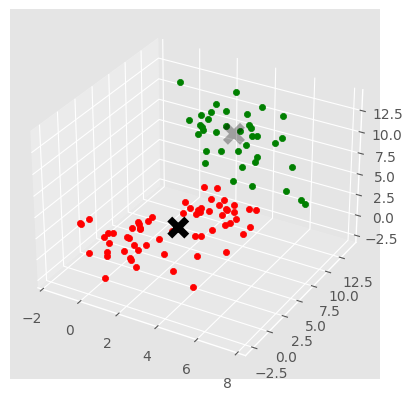

In [2]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

We continue the topic of clustering and unsupervised machine learning with Mean Shift, this time applying it to our Titanic dataset.

There is some degree of randomness here, so your results may not be the same. You can probably re-run the program to get similar data if you don't get something similar, however.


We're going to take a look at the Titanic dataset via clustering with Mean Shift. What we're interested to know is whether or not Mean Shift will automatically separate passengers into groups or not. If so, it will be interesting to inspect the groups that are created. The first obvious curiosity will be the survival rates of the groups found, but, then, we will also poke into the attributes of these groups to see if we can understand why the Mean Shift algorithm decided on the specific groups.

To begin, we will use code you have seen already up to this point:



In [5]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn.model_selection import cross_validate
import pandas as pd
import matplotlib.pyplot as plt


'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):

    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:

            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them.
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string.
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

<ipython-input-5-7d836edc385c>:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['body','name'], 1, inplace=True)
<ipython-input-5-7d836edc385c>:64: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['ticket','home.dest'], 1, inplace=True)
<ipython-input-5-7d836edc385c>:66: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['survived'], 1).astype(float))


MeanShift()

...except for two additions, one is original_df = pd.DataFrame.copy(df) right after we read the csv file to our df object, the other is importing MeanShift from sklearn.cluster (and using MeanShift as our classifier). We are making the copy so that we can later reference the data in it's original non-numerical form.

Now that we've created the fitment, we can get some attributes from our clf object:

In [6]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

Next, we're going to add a new column to our original dataframe:

In [7]:
original_df['cluster_group']=np.nan

Now, we can iterate through the labels and populate the labels to the empty column:

In [8]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

<ipython-input-8-fc1bb3e63b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df['cluster_group'].iloc[i] = labels[i]


Next, we can check the survival rates for each of the groups we happen to find:

In [9]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate

print(survival_rates)

{0: 0.3770491803278688, 1: 0.8888888888888888, 2: 0.1}


If we run this, we get something like:

{0: 0.3796583850931677, 1: 0.9090909090909091, 2: 0.1}
Again, you may get more groups. I got three here, but I've personally got up to six groups on this same dataset. Right away, we see that group 0 has a 38% survival rate, group 1 has a 91% survival rate, and group 2 has a 10% survival rate. This is somewhat curious as we know there were three actual "passenger classes" on the ship. I immediately wonder if 0 is the second-class group, 1 is first-class, and 2 is 3rd class. The classes on the ship were ordered with 3rd class on the bottom, and first class on the top. The bottom flooded first, and the top is where the life-boats were. I can look deeper by doing:

In [10]:
print(original_df[ (original_df['cluster_group']==1) ])

     pclass  survived                                               name  \
17        1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
35        1         1                           Bowen, Miss. Grace Scott   
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
66        1         1                        Chaudanson, Miss. Victorine   
97        1         1  Douglas, Mrs. Frederick Charles (Mary Helene B...   
111       1         1                     Fortune, Miss. Alice Elizabeth   
112       1         1                         Fortune, Miss. Ethel Flora   
113       1         1                         Fortune, Miss. Mabel Helen   
115       1         0                                  Fortune, Mr. Mark   
116       1         1                Fortune, Mrs. Mark (Mary McDougald)   
183       1         1                             Lesurer, Mr. Gustave J   
249       1 

Sure enough, this entire group is first-class. That said, there are actually only 11 people here. Let's look into group 0, which seemed a bit more diverse. This time, we will use the .describe() method via Pandas:

In [11]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived          age        sibsp        parch  \
count  1281.000000  1281.000000  1020.000000  1281.000000  1281.000000   
mean      2.307572     0.377049    29.661438     0.487900     0.323185   
std       0.830482     0.484837    14.380042     1.041357     0.672101   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    38.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     4.000000   

              fare        body  cluster_group  
count  1280.000000  119.000000         1281.0  
mean     29.240208  159.571429            0.0  
std      37.892453   97.302914            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   71.000000            0.0  
50%      13.900000  155.000000            0.0

1,287 people here. We can see the average class here is just above 2nd class, but this ranges from 1st to 3rd.

Let's check the final group, 2, which we are expected to all be 3rd class:

In [12]:
print(original_df[ (original_df['cluster_group']==2) ].describe())

       pclass   survived        age      sibsp      parch       fare  \
count    10.0  10.000000   8.000000  10.000000  10.000000  10.000000   
mean      3.0   0.100000  39.875000   0.800000   6.000000  42.703750   
std       0.0   0.316228   1.552648   0.421637   1.632993  15.590194   
min       3.0   0.000000  38.000000   0.000000   5.000000  29.125000   
25%       3.0   0.000000  39.000000   1.000000   5.000000  31.303125   
50%       3.0   0.000000  39.500000   1.000000   5.000000  35.537500   
75%       3.0   0.000000  40.250000   1.000000   6.000000  46.900000   
max       3.0   1.000000  43.000000   1.000000   9.000000  69.550000   

             body  cluster_group  
count    2.000000           10.0  
mean   234.500000            2.0  
std    130.814755            0.0  
min    142.000000            2.0  
25%    188.250000            2.0  
50%    234.500000            2.0  
75%    280.750000            2.0  
max    327.000000            2.0  


Sure enough, we are correct, this group, which had the worst survival rate, is all 3rd class.

Interestingly enough, when looking at all groups, the range of ticket prices in group 2, which was the worst faring group, indeed had the lowest fares, ranging from 29 to 69 pounds.


When we look at cluster 0, the range of fares goes up to 263 pounds. This is the largest group, with 38% survival.

When we revisit cluster 1, which is all first-class, we see the range of fare here is 247-512, with a mean of 350. Despite cluster 0 having some 1st class passengers, it's clear this group is the most elite group.

Out of curiosity, what is the survival rate of the 1st class passengers in cluster 0, compared to the overall survival rate of cluster 0?

In [13]:
cluster_0 = (original_df[ (original_df['cluster_group']==0) ])
cluster_0_fc = (cluster_0[ (cluster_0['pclass']==1) ])
print(cluster_0_fc.describe())

       pclass    survived         age       sibsp       parch        fare  \
count   305.0  305.000000  266.000000  305.000000  305.000000  305.000000   
mean      1.0    0.603279   39.245927    0.396721    0.288525   73.998101   
std       0.0    0.490021   14.471964    0.541066    0.586610   54.019317   
min       1.0    0.000000    0.916700    0.000000    0.000000    0.000000   
25%       1.0    0.000000   28.625000    0.000000    0.000000   30.500000   
50%       1.0    1.000000   39.000000    0.000000    0.000000   57.750000   
75%       1.0    1.000000   49.750000    1.000000    0.000000   90.000000   
max       1.0    1.000000   80.000000    3.000000    2.000000  263.000000   

             body  cluster_group  
count   35.000000          305.0  
mean   162.828571            0.0  
std     82.652172            0.0  
min     16.000000            0.0  
25%    109.500000            0.0  
50%    166.000000            0.0  
75%    233.000000            0.0  
max    307.000000         